In [1]:
import numpy as np
import matplotlib.pyplot as plt

import fresnel

In [2]:
energy = 14.41 # keV
wavelength = 1239.8 / (energy * 1e3) # in nm

In [3]:
def intensity(field):
    return np.square(np.abs(field))

## define illumination

In [4]:
xmax = 100 # field of view (in nm)
nx = 200 # number of samples
xx_nm, dx_nm = np.linspace(-xmax, xmax, nx, endpoint=True, retstep=True)

width_nm = 20 # width of aperture (in nm)
aperture_fn = fresnel.RectangularAperture(width_nm, wavelength, dtype=np.complex128)
gauss_fn = fresnel.GaussianAperture(width_nm, wavelength)

Text(0.5, 1.0, 'Illumination')

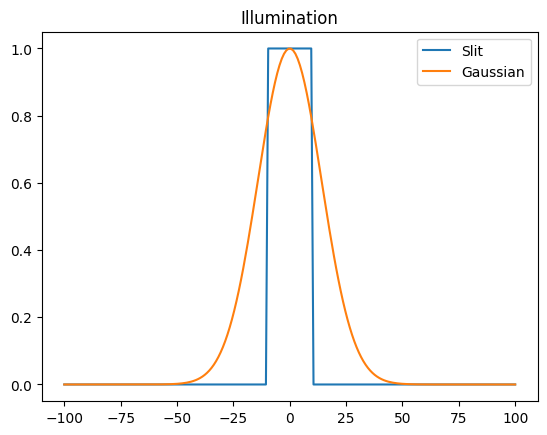

In [5]:
fig, ax = plt.subplots()
ax.plot(xx_nm, aperture_fn(xx_nm).real, label='Slit')
ax.plot(xx_nm, gauss_fn(xx_nm).real, label='Gaussian')
ax.legend()
ax.set_title('Illumination')

## FraunhoferPropagator

In [6]:
# set dz = 1 to disable scaling
dz = 10
prop = fresnel.FraunhoferPropagator(xx_nm.shape, (dx_nm,), dz=dz, wl=wavelength)
th, dth = prop.coordinates(retstep=True)
th = np.squeeze(th)
dth = np.squeeze(dth)

### diffraction from aperture

In [7]:
u0 = aperture_fn(xx_nm)
uprop = prop(u0)
uprop_ana = aperture_fn.far_field(th, dz = dz)
uprop_ana_nophase = aperture_fn.far_field(th, dz = dz, with_phase=False)

Text(0.5, 1.0, 'Diffraction from aperture')

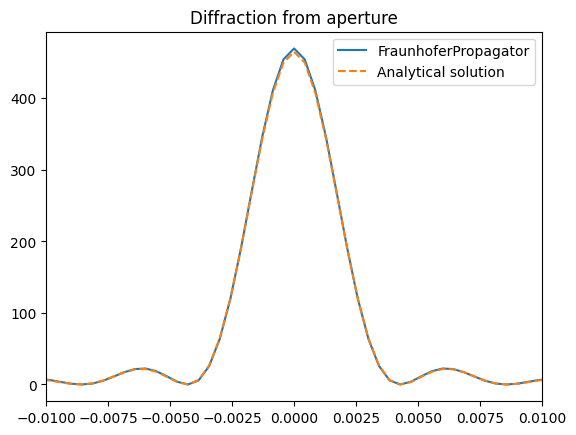

In [8]:
fig, ax = plt.subplots()
ax.plot(th, intensity(uprop), label='FraunhoferPropagator')
ax.plot(th, intensity(uprop_ana), ls = '--', label='Analytical solution')
ax.set_xlim(-0.01, 0.01)
ax.legend()
ax.set_title('Diffraction from aperture')

Note that the result is properly normalized, and intensity is conserved, if integrated over the field of view.

Keep in mind that uprop is in units of angle, so to approximate the integral over the surface area (or line in 1d), the stepsize in units of distance, dth * dz, needs to be taken into account.

In [9]:
print(intensity(u0).sum() * dx_nm )
print(intensity(uprop).sum() * dth)
print(intensity(uprop_ana).sum() * dth)
print(intensity(uprop_ana_nophase).sum() * dth)

20.100502512562812
2.0100502512562812
1.979741016879707
1.9797410168797074


### diffraction of Gaussian beam

In [10]:
u0 = gauss_fn(xx_nm)
uprop = prop(u0)
uprop_ana = gauss_fn.far_field(th, dz=dz)


In [11]:
print(intensity(u0).sum() * dx_nm)
print(intensity(uprop).sum() * dth)
print(intensity(uprop_ana).sum() * dth)


25.066282746310005
2.5066282746310007
2.506628274631


Text(0.5, 1.0, 'Diffraction from Gaussian beam')

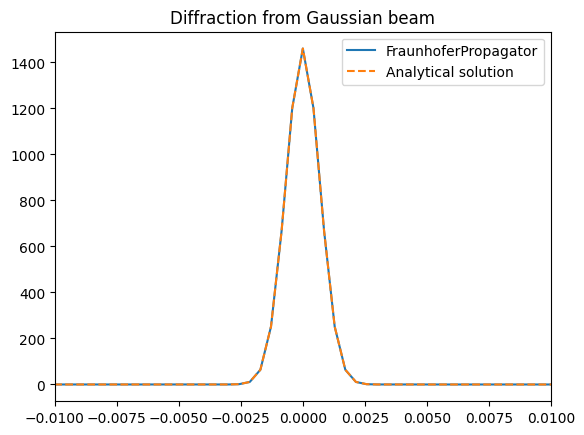

In [12]:
fig, ax = plt.subplots()
ax.plot(th, intensity(uprop), label='FraunhoferPropagator')
ax.plot(th, intensity(uprop_ana), ls = '--', label='Analytical solution')
ax.set_xlim(-0.01, 0.01)
ax.legend()
ax.set_title('Diffraction from Gaussian beam')
